In [44]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
#train csv data get
train_data_set = pd.read_csv('./digit-recognizer/train.csv', header=0)
train_data_frames = pd.DataFrame(train_data_set)
print(train_data_frames)
train_array = np.array(train_data_frames.values)
print(train_array[:,1])

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [47]:
#test csv data get
test_data_set = pd.read_csv('./digit-recognizer/test.csv', header=0)
test_data_frames = pd.DataFrame(test_data_set)
print(test_data_frames)
test_data = np.array(test_data_frames.values)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [48]:
#separate train images and labels
train_label = train_array[:,0]
train_data = train_array[:,1:]

In [49]:
#showing shape train images and labels
print(len(train_label))
print(train_data.shape)
print(test_data.shape)

42000
(42000, 784)
(28000, 784)


In [50]:
#train data reshape flat image data to 28x28 image format
print(train_data[0:1,:].reshape(28,28))
single_data = train_data[3:4,:].reshape(28,28)
print(single_data.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [51]:
#train data reformating 0-1 range rgb image data
train_data = train_data / 255.0

In [53]:
#test data reshape flat image data to 28x28 image format
print(test_data[0:1,:].reshape(28,28))
single_data_test = test_data[0:1,:].reshape(28,28)
print(single_data_test.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10  17  17  17  17  81 180 180
   35   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 139 253 253 253 253 253 253 253
   48   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  60 228 253 253 253 253 253 253 253
  207 197  46   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 213 253 253 253 253 253 253 253 253
  253 253 223  52   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  66 231 253 253 253 108  4

In [54]:
#test data reformating 0-1 range rgb image data
test_data = test_data / 255.0

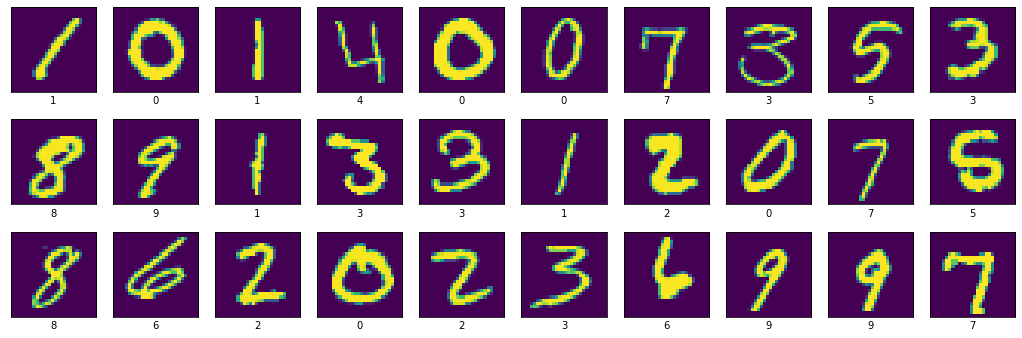

In [55]:
#train data view
plt.figure(figsize=(18,10))
for i in range(30):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i:i+1,:].reshape(28,28))
    plt.xlabel(train_label[i])
plt.show()

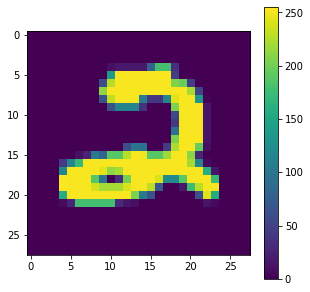

In [56]:
#test data view
plt.figure(figsize=(5,5))
plt.imshow(single_data_test)
plt.colorbar()
plt.grid(False)
plt.show()

In [57]:
#Sequential model preparing
digit_model = keras.Sequential([
    keras.Input(shape=(784)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [58]:
#compiling the model
digit_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [59]:
#training the model with train data
digit_model.fit(train_data, train_label, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 1s 652us/step - loss: 0.3022 - accuracy: 0.9148
Epoch 2/10
1313/1313 [==============================] - 1s 656us/step - loss: 0.1333 - accuracy: 0.9605
Epoch 3/10
1313/1313 [==============================] - 1s 655us/step - loss: 0.0907 - accuracy: 0.9727
Epoch 4/10
1313/1313 [==============================] - 1s 656us/step - loss: 0.0675 - accuracy: 0.9802
Epoch 5/10
1313/1313 [==============================] - 1s 662us/step - loss: 0.0520 - accuracy: 0.9845
Epoch 6/10
1313/1313 [==============================] - 1s 660us/step - loss: 0.0402 - accuracy: 0.9880
Epoch 7/10
1313/1313 [==============================] - 1s 662us/step - loss: 0.0323 - accuracy: 0.9902
Epoch 8/10
1313/1313 [==============================] - 1s 665us/step - loss: 0.0253 - accuracy: 0.9931
Epoch 9/10
1313/1313 [==============================] - 1s 658us/step - loss: 0.0212 - accuracy: 0.9933
Epoch 10/10
1313/1313 [==============================] - 1s 663u

In [60]:
#ploting image function
def plot_image(i, predictions_array, img):
  predictions_array, img = predictions_array, img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.reshape(28,28), cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  
  color = 'blue'


  plt.xlabel("{} {:2.0f}%".format(predicted_label,
                           100*np.max(predictions_array)),
                           color=color)

#ploting class prediction function             
def plot_value_array(i, predictions_array):
     predictions_array = predictions_array
     plt.grid(False)
     plt.xticks(range(10))
     plt.yticks([])
     thisplot = plt.bar(range(10), predictions_array, color="#777777")
     plt.ylim([0, 1])
     predicted_label = np.argmax(predictions_array)

     thisplot[predicted_label].set_color('blue')

In [61]:
#probability model prepare from trained digit model 
probability_model = tf.keras.Sequential([digit_model, 
                                         tf.keras.layers.Softmax()])

In [62]:
#prediction from test data
predictions = probability_model.predict(test_data)

In [66]:
#prediction data shape showing
print(predictions.shape)
predictions[0]

(28000, 10)


array([3.0691362e-13, 5.9490790e-17, 1.0000000e+00, 7.5360294e-11,
       1.2315323e-12, 5.8321891e-17, 2.1627094e-16, 7.3341284e-11,
       6.2488681e-13, 2.1558337e-14], dtype=float32)

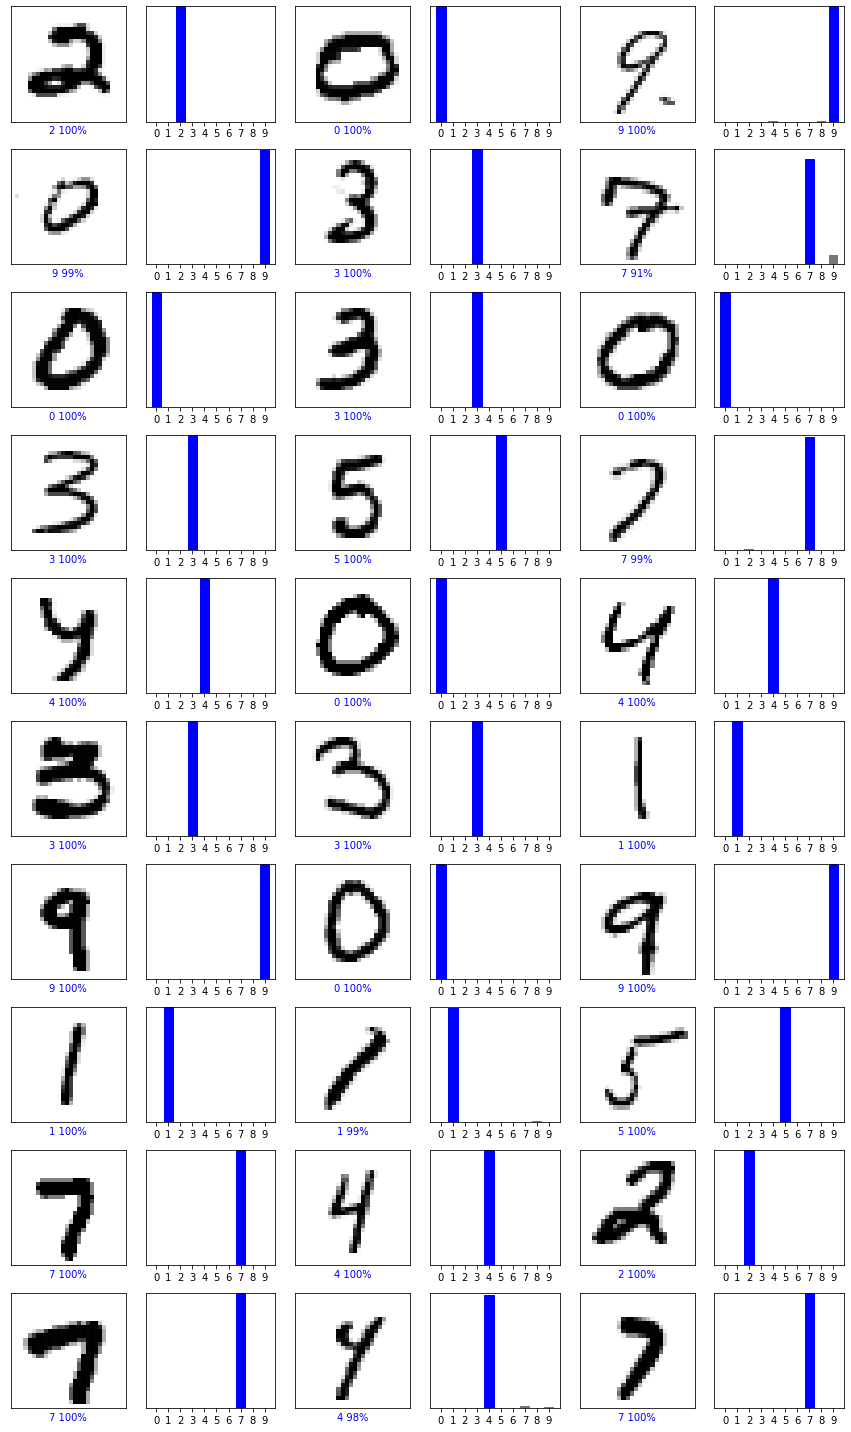

In [65]:
#showing prediction image with prediction graph 
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i])
plt.tight_layout()
plt.show()